# Creating deep layer autoencoder using MNIST and ANN

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\boltuzamaki\anaconda3\e

In [2]:
# Preprocessing/ reshaping input images

(X_train, _), (X_test, _) = mnist.load_data()              # Load mnist data

X_train = X_train.astype('float32')/255                    # Normalize mnist data
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:])) # Reshaping image to 1-D
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [3]:
input_img= Input(shape=(784,))     # Converting to input image into keras tensor
input_img.shape

TensorShape([Dimension(None), Dimension(784)])

In [4]:
layer1 = Dense(units = 128, activation = 'relu')(input_img)        # encoder layers
layer2 = Dense(units = 64, activation = 'relu')(layer1)
layer3 =  Dense(units = 32, activation = 'relu')(layer2)        # We find Encodings here
layer4 = Dense(units = 64, activation = 'relu')(layer3)          # Decoder layers
layer5 = Dense(units = 128, activation = 'relu')(layer4)
final_layer =Dense(units = 784, activation = 'sigmoid')(layer5)   ## decoded image

In [5]:
autoencoder = Model(input_img, final_layer)      # Creating autoencoder model

In [6]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total para

In [7]:
encoder = Model(input_img, layer3)                     # Creating encoder model

In [8]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Creating decoder separately

encoded_input = Input(shape=(32,))
decoder_layer3 = autoencoder.layers[-3](encoded_input)
decoder_layer2 = autoencoder.layers[-2](decoder_layer3)
decoder_layer1 = autoencoder.layers[-1](decoder_layer2) 

In [10]:
decoder = Model(encoded_input, decoder_layer1)

In [11]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the mdoel
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s 160us/step - loss: 0.2489 - acc: 0.7841 - val_loss: 0.1684 - val_acc: 0.8001
Epoch 2/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1518 - acc: 0.8047 - val_loss: 0.1387 - val_acc: 0.8060
Epoch 3/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.1333 - acc: 0.8083 - val_loss: 0.1256 - val_acc: 0.8082
Epoch 4/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1237 - acc: 0.8098 - val_loss: 0.1193 - val_acc: 0.8100
Epoch 5/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.1177 - acc: 0.8108 - val_loss: 0.1132 - val_acc: 0.8099
Epoch 6/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.1126 - acc: 0.8115 - val_loss: 0.1090 - val_acc: 0.8109
Epoch 7/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.1090 - acc: 0.8120 - val_loss: 0.1060 - val_a

In [14]:
# Saving model and weights of autoencoder
model_json = autoencoder.to_json()
with open("deep_autoencoder_model", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("deep_autoencoder_model.h5"),
print("Saved model to disk")

Saved model to disk


In [15]:
# Saving model and weights of encoder
model_json = encoder.to_json()
with open("deep_autoencoder_model_encoder_only", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
encoder.save_weights("deep_autoencoder_model_encoder_only.h5"),
print("Saved model to disk")

Saved model to disk


In [16]:
# Saving model and weights of decoder
model_json = decoder.to_json()
with open("deep_autoencoder_model_decoder_only", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
decoder.save_weights("deep_autoencoder_model_decoder_only.h5"),
print("Saved model to disk")

Saved model to disk


In [17]:
encoded_imgs = encoder.predict(X_test)                 # Here the image is converted into encoded vector
predicted = autoencoder.predict(X_test)                # The autoencoder taking real image and produce a image
decoder_predict = decoder.predict(encoded_imgs)        # The decoder producing image using encoded vector

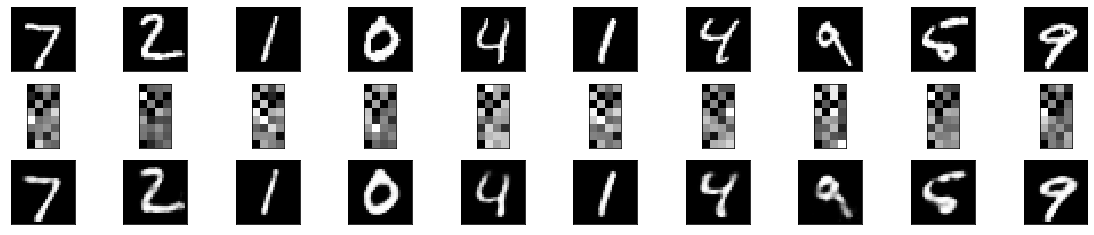

In [18]:
# Plotting figure 

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(decoder_predict[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()

# The first one is real image
# Sencond one is the encoded value
# This one is the image created by encoded vector